In this notebook we will examine implementations of the multivariate hypothesis testing methods discussed in the slides.

In [1]:
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy import stats

import scipy.spatial.distance as distance

import pandas as pd

import statsmodels.api as sm

import numpy.linalg as LA

from hotelling.stats import hotelling_t2

We'll start with the univariate t test on the Subway "footlong" data

In [2]:
subs1 = pd.read_csv("./Subway.csv")

In [3]:
xbar = np.mean(subs1['length'])
sdev = np.std(subs1['length'])

n = len(subs1)

SE = sdev/np.sqrt(n)

SE = stats.sem(subs1['length'])

tval = (xbar - 12)/SE

print(tval)

-5.406520180502453


In [4]:
pval = 2 * (1-stats.t.cdf(abs(tval),df = n-1))
print(pval)

1.993480985840179e-06


In [5]:
alpha = .05

critical = stats.t.ppf(1-alpha/2,n-1)
print(critical)

2.0106347546964454


In [6]:
abs(tval) > critical

True

In [7]:
con_int = [xbar-critical*SE, xbar+critical*SE]
print(con_int)

[11.727045168087042, 11.875029800011628]


In [8]:
#There is also a built-in function that returns the same results
stats.ttest_1samp(subs1['length'],12)

TtestResult(statistic=-5.406520180502453, pvalue=1.993480985879555e-06, df=48)

Since our dataset has 49 data points, we expect the mean to be distributed as a t distribution with 48 degrees of freedom.
We get the same values either way which is a good sign! And in this case our p-value is low enough (or
equivalently our tvalue is in the rejection region), so we feel comfortable rejecting the null hypothesis. Having
discovered that our nearest sandwich shop is problematic, we might try visiting the other shop in town and
seeing if we can compare the two values:

In [9]:
subs2 = pd.read_csv('./Subway2.csv')

In [10]:
stats.ttest_ind(subs1['length'],subs2['length'],equal_var = False)

TtestResult(statistic=-2.6237446509553415, pvalue=0.013990839265349882, df=27.65913695385578)

In [11]:
x2bar = np.mean(subs2['length'])

sdev2 = np.std(subs2['length'])

n2 = len(subs2)

tval = (xbar-x2bar)/(np.sqrt(sdev**2/n + sdev2**2/n2))

print(tval)

-2.677496956892342


This is likely to lead us to reject the hypothesis that these are drawn from the same distribution and hence assume that there is a meaningful difference between the restaurants.

For multivariate data the presence of covariance means that we don’t just want to test the individual variables
separately. We’ll take a look at some SAT data from EWU as an example, comparing to the national averages
of 528 and 531. One thing to note is that the test statistic returned by the function is the normalized version
that is distributed according to the F distribution. For this example with p=2 and 87 data points, this is the
F distribution with 2 and 85 degrees of freedom.

In [12]:
EWU = pd.read_csv("./EWU_SAT.csv")
EWU.head()

EWU_array = np.array(EWU[['Math','Language']])

In [13]:
hotelling_t2(EWU_array,np.array([528,531]))

(0.6421600200912195,
 0.31734652155670734,
 0.728937286734304,
 array([[5808.05934242, 5355.11467522],
        [5355.11467522, 8287.43624699]]))

In [14]:
xbar = np.mean(EWU_array,0)
print(xbar)

[526.5862069  534.55172414]


In [15]:
S = np.cov(EWU_array.T)
print(S)

[[5808.05934242 5355.11467522]
 [5355.11467522 8287.43624699]]


In [16]:
n = len(EWU)

HT2 = n* (xbar - (528,531)) @ LA.inv(S) @ (xbar - (528,531))

print(HT2)

0.6421600200912195


In [17]:
p = 2

Fstat = ((n-p)/((n-1)*p))*HT2

print (Fstat)

0.31734652155670734


In [18]:
1 - stats.f.cdf(Fstat,p,n-p)

0.728937286734305

In [19]:
alpha = .05
critical = stats.f.ppf(1-alpha,p,n-p)

print(critical)

3.1038386606377033


To compare to this rejection region for WSU data we might simulate some potential models for our distribution,
which has a slightly higher mean. Just as in the unviariate case, we can also compute a two sample test
statistic testing whether the two schools distributions are the same. 

In [20]:
WSU = stats.multivariate_normal.rvs(mean=[560,560],cov=S,size=100)

hotelling_t2(WSU,np.array([528,531]))

(9.292841475591059,
 4.599487194989514,
 0.012323578129282134,
 array([[5732.46859393, 4647.21214512],
        [4647.21214512, 7333.70214835]]))

In [21]:
hotelling_t2(EWU_array,WSU)

(5.182076676206873,
 2.5770327254650396,
 0.07875528527581982,
 array([[5767.60807701, 4976.29115911],
        [4976.29115911, 7777.05962123]]))

Thus, we are pretty confident in rejecting that the means for the WSU vector are the same as for the EWU data but less confident in rejecting that the two come from the same distribution overall. 

We should also do some checks of the normality of the EWU data to ensure that this test is reasonable. 

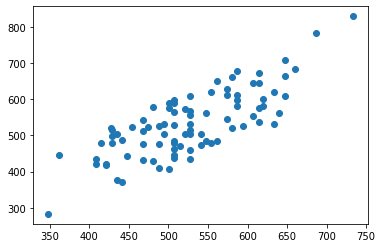

In [22]:
plt.scatter(EWU['Math'],EWU['Language'])

(array([ 2.,  0.,  5.,  9.,  6., 10., 20.,  4.,  7.,  7.,  8.,  6.,  1.,
         1.,  1.]),
 array([348.        , 373.66666667, 399.33333333, 425.        ,
        450.66666667, 476.33333333, 502.        , 527.66666667,
        553.33333333, 579.        , 604.66666667, 630.33333333,
        656.        , 681.66666667, 707.33333333, 733.        ]),
 <BarContainer object of 15 artists>)

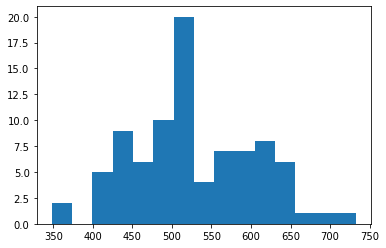

In [23]:
plt.hist(EWU['Math'],bins=15)

(array([ 1.,  0.,  2.,  5., 10., 13., 19.,  9., 12.,  7.,  5.,  2.,  0.,
         1.,  1.]),
 array([283.        , 319.46666667, 355.93333333, 392.4       ,
        428.86666667, 465.33333333, 501.8       , 538.26666667,
        574.73333333, 611.2       , 647.66666667, 684.13333333,
        720.6       , 757.06666667, 793.53333333, 830.        ]),
 <BarContainer object of 15 artists>)

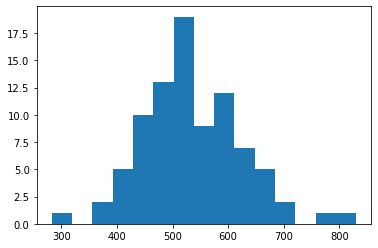

In [24]:
plt.hist(EWU['Language'],bins=15)

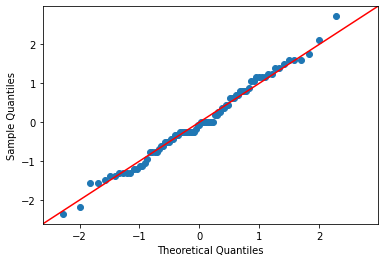

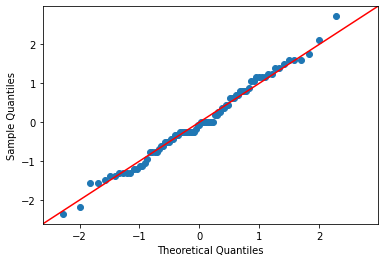

In [25]:
sm.qqplot(EWU['Math'],fit=True,line="45")

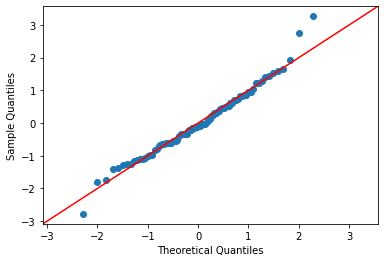

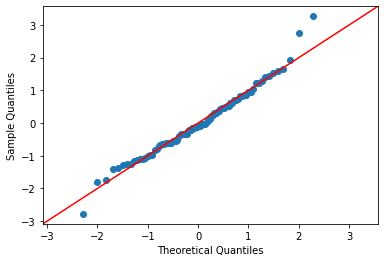

In [26]:
sm.qqplot(EWU['Language'],fit=True,line="45")

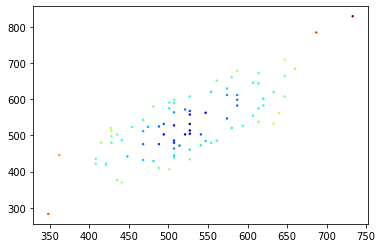

In [27]:
M_distances = np.array([distance.mahalanobis(x, [528,531], LA.inv(S)) for x in EWU_array])
d = M_distances**2

plt.scatter(EWU_array[:,0],EWU_array[:,1],c=M_distances,s=2,cmap='jet')

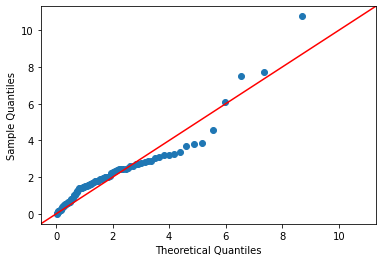

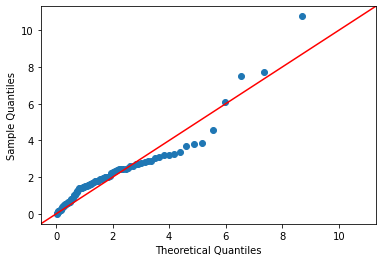

In [28]:
sm.qqplot(d, stats.chi2, distargs=(2,), fit=True, line="45")

This is a good notebook to do some exploring in. Try loading in some of the other datasets we have
used this term (or those from the book) and compute some tests both with the built-in methods as well as
direct computation. For each test, make sure you evaluate the normality of the data. It is also useful to do
some of this testing with synthetic examples that you know should succeed or fail to build some intuition
around what those cases look like.